In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix

In [6]:
# Loading the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
col_names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df = pd.read_csv(url, names = col_names)

# Take a look into data 
df.head()

id  clump_thickness  uniform_cell_size  uniform_cell_shape  \
0  1000025                5                  1                   1   
1  1002945                5                  4                   4   
2  1015425                3                  1                   1   
3  1016277                6                  8                   8   
4  1017023                4                  1                   1   

   marginal_adhesion  single_epithelial_size bare_nuclei  bland_chromatin  \
0                  1                       2           1                3   
1                  5                       7          10                3   
2                  1                       2           2                3   
3                  1                       3           4                3   
4                  3                       2           1                3   

   normal_nucleoli  mitoses  class  
0                1        1      2  
1                2        1      2  
2                1        1      2  
3                7        1      2  
4                1        1      2

In [7]:
#Preprocess the data
df.drop(['id'], axis = "columns", inplace=True)

# Check size and distrbution of individual values 
print(df.axes)
print(df.shape)
df.describe()

[RangeIndex(start=0, stop=699, step=1), Index(['clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]
(699, 10)


clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromatin  \
count         699.000000              699.000000       699.000000   
mean            2.806867                3.216023         3.437768   
std             2.855379                2.214300         2.438364   
min             1.000000                1.000000         1.000000   
25%             1.000000                2.000000         2.000000   
50%             1.000000                2.000000         3.000000   
75%             4.000000                4.000000         5.000000   
max            10.000000               10.000000        10.000000   

       normal_nucleoli     mitoses       class  
count       699.000000  699.000000  699.000000  
mean          2.866953    1.589413    2.689557  
std           3.053634    1.715078    0.951273  
min           1.000000    1.000000    2.000000  
25%           1.000000    1.000000    2.000000  
50%           1.000000    1.000000    2.000000  
75%           4.000000    1.000000    4.000000  
max          10.000000   10.000000    4.000000

In [8]:
# Handle missing datas
# Checking datatypes to find which column contains missing data 
df.dtypes

clump_thickness            int64
uniform_cell_size          int64
uniform_cell_shape         int64
marginal_adhesion          int64
single_epithelial_size     int64
bare_nuclei               object
bland_chromatin            int64
normal_nucleoli            int64
mitoses                    int64
class                      int64
dtype: object

In [21]:
# As 'bare_nuclei' column is object type instead of int64, it might contain missing data 
# Counting no. of columns containing missing datas 
missing = df.loc[df['bare_nuclei'] == '?'].index           # missing contains index of missing data 
print(len(missing))
# df.replace('?', -99999, inplace = True)

16


In [22]:
# As the number of colums containing missing data were small, we will drop those rows  
df.drop(missing, axis="index", inplace=True)
df.shape

(683, 10)

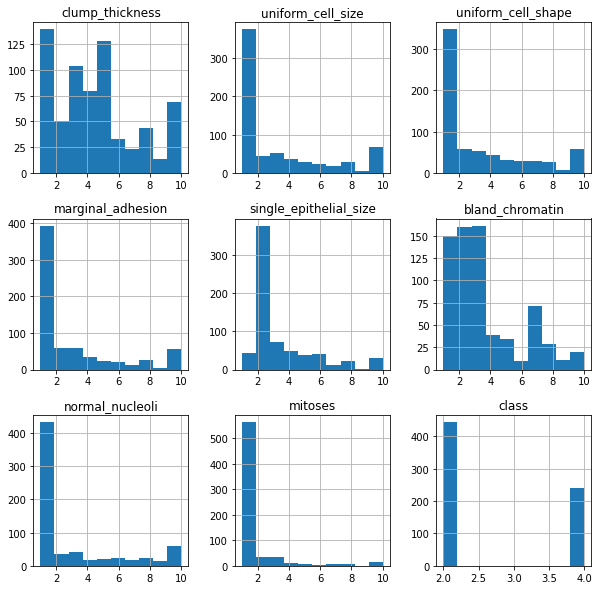

In [23]:
# Plot histogram for each variable 
df.hist(figsize = (10, 10))
plt.show()

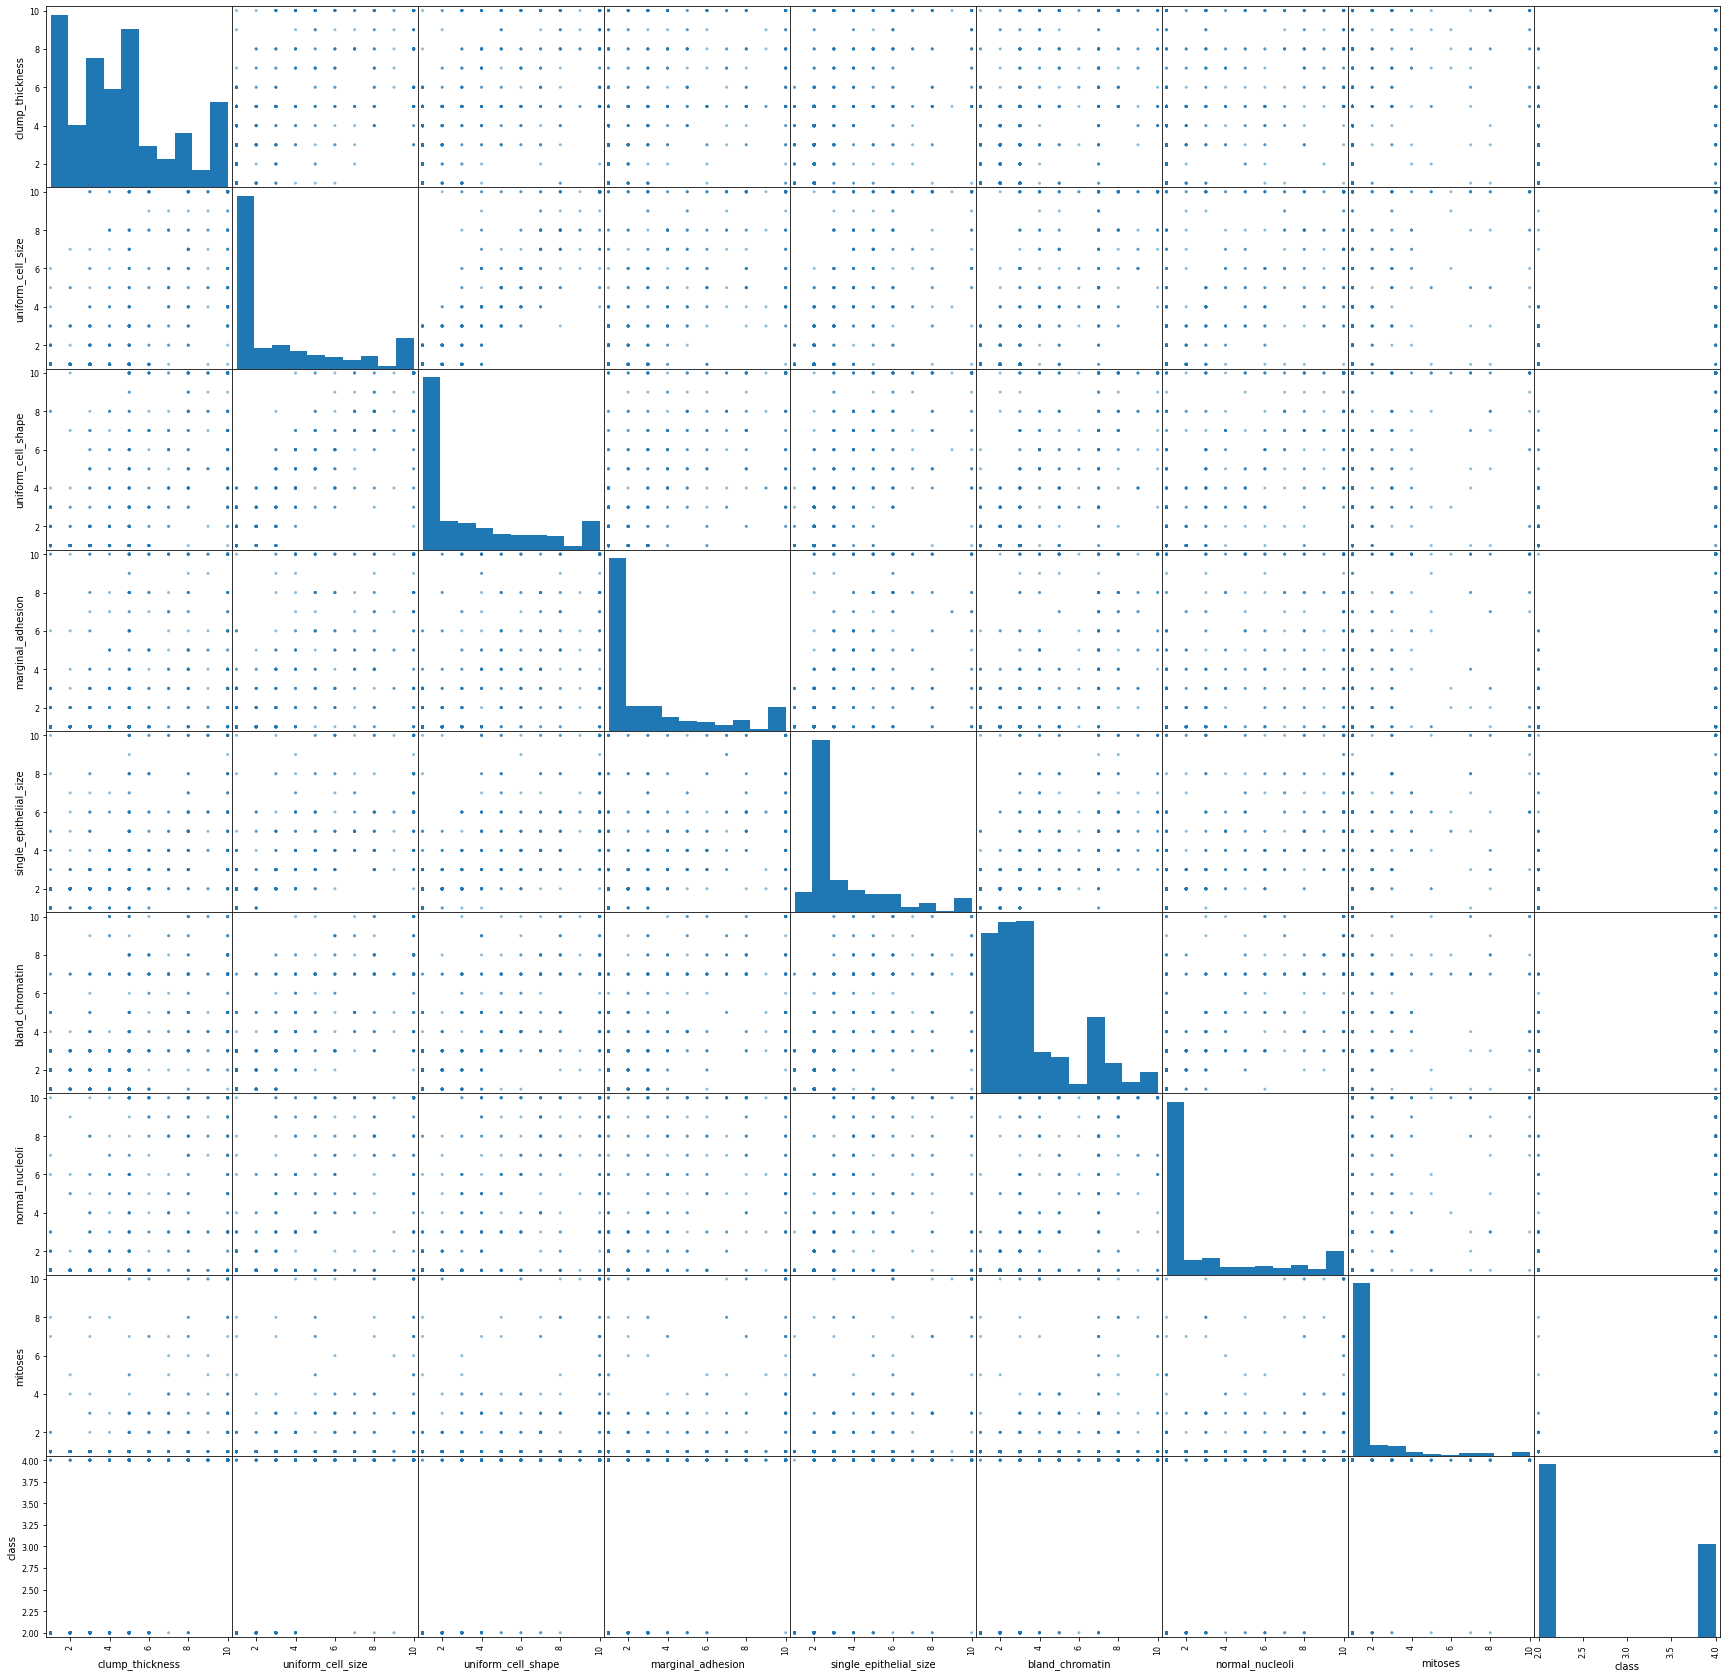

In [24]:
scatter_matrix(df, figsize = (30,30))
plt.show()

In [33]:
# Create X and Y Datasets for training and testing

X = np.array(df.drop(["class"], 1))
Y = np.array(df["class"])

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.2)

In [34]:
# Training the models
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC(kernel='linear')))

#Evaluating each model in turn

for name, model in models:
    kfold = model_selection.KFold(n_splits = 10)
    cv_result = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    print(" %s : %f (%f)" %(name, cv_result.mean(), cv_result.std()))

 KNN : 0.979832 (0.019097)
 SVM : 0.968889 (0.021643)


In [35]:
# Make predictions on validation set

for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(Y_test, predictions))
    print(classification_report(Y_test, predictions))

KNN
0.9708029197080292
              precision    recall  f1-score   support

           2       0.98      0.98      0.98        83
           4       0.96      0.96      0.96        54

    accuracy                           0.97       137
   macro avg       0.97      0.97      0.97       137
weighted avg       0.97      0.97      0.97       137

SVM
0.9562043795620438
              precision    recall  f1-score   support

           2       0.96      0.96      0.96        83
           4       0.94      0.94      0.94        54

    accuracy                           0.96       137
   macro avg       0.95      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137



In [36]:
# As KNN has better performance over SVC therefore we will use KNN algorithm for predictions in our website. 
# Buiding model to store its classifier in the file
clf = KNeighborsClassifier(n_neighbors=5)

clf.fit(X_train, Y_train)

accuracy = clf.score(X_test, Y_test)
# Checking model is built without error 
print(accuracy)

0.9708029197080292


In [40]:
# Storing model in the file 
import pickle

pickle.dump(clf, open('./../../backend/script/kNeighborsClassifier.pkl','wb'))